# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train_csv', header = 0, index_col=False, encoding='iso-8859-1')

In [3]:
train_df.drop('Unnamed: 0', axis = 1, inplace=True)

In [4]:
test_df = pd.read_csv('test_csv', header = 0, index_col=False, encoding='iso-8859-1')
test_df.drop('Unnamed: 0', axis = 1, inplace=True)

In [5]:
train_df.shape

(389855, 200)

In [6]:
train_df.head()

,track_id,year,artist_name,artist_id,song_title,song_beats_persecond,song_duration,song_end_fade_in,song_start_fade_out,song_key,...,timbre80,timbre81,timbre82,timbre83,timbre84,timbre85,timbre86,timbre87,timbre88,timbre89
0,62221,2001,The Bristols,AR002UA1187B9A637D,Little Baby,2.028249,137.06404,0.276,124.987,5,...,36.297724,2.587756,0.971701,-26.216825,5.050970,-10.341241,3.550053,-6.363039,6.630155,-3.351419
1,77565,2001,The Bristols,AR002UA1187B9A637D,A Picture Of You,1.668476,128.26077,0.225,122.474,9,...,73.077501,8.748606,-17.406284,-13.099049,-25.012023,-12.232571,7.830893,-2.467830,3.321361,-2.315212
2,92900,2001,The Bristols,AR002UA1187B9A637D,The Beating Of My Heart,1.445382,141.13914,0.235,127.652,6,...,70.326789,12.946360,-10.324368,-24.837769,8.766298,-0.920194,18.765484,4.592097,2.219196,0.340061
3,198684,2001,The Bristols,AR002UA1187B9A637D,Who Does She Think She Is,2.567431,108.66893,0.258,105.233,1,...,50.535168,11.552168,-27.247643,-8.782058,-12.042823,-9.539300,28.618106,8.254348,-0.437426,5.662652
4,239150,2001,The Bristols,AR002UA1187B9A637D,I'll Be Gone,2.591111,152.05832,0.222,145.293,9,...,55.818511,13.416927,-6.578979,-18.549397,-3.278718,-2.350345,16.070168,1.395176,2.735530,0.828039


In [7]:
test_df.shape

(1103, 200)

In [7]:
def splitXY(train_df):
    trainX_df = train_df.ix[:,5:200]
    trainY_df = pd.DataFrame(train_df.ix[:,1])
    return trainX_df, trainY_df

In [8]:
trainX_df, trainY_df = splitXY(train_df)
testX_df, testY_df = splitXY(test_df)

In [9]:
trainX_df.head()

,song_beats_persecond,song_duration,song_end_fade_in,song_start_fade_out,song_key,song_loudness,song_loudness_max,song_loudness_min,song_loudness_med,song_loudness_time_max,...,timbre80,timbre81,timbre82,timbre83,timbre84,timbre85,timbre86,timbre87,timbre88,timbre89
0,2.028249,137.06404,0.276,124.987,5,-7.390,0.1,0.000001,0.1,0.029211,...,36.297724,2.587756,0.971701,-26.216825,5.050970,-10.341241,3.550053,-6.363039,6.630155,-3.351419
1,1.668476,128.26077,0.225,122.474,9,-6.822,0.1,0.000001,0.1,0.062526,...,73.077501,8.748606,-17.406284,-13.099049,-25.012023,-12.232571,7.830893,-2.467830,3.321361,-2.315212
2,1.445382,141.13914,0.235,127.652,6,-6.855,0.1,0.000001,0.1,0.054405,...,70.326789,12.946360,-10.324368,-24.837769,8.766298,-0.920194,18.765484,4.592097,2.219196,0.340061
3,2.567431,108.66893,0.258,105.233,1,-5.633,0.1,0.000001,0.1,0.025350,...,50.535168,11.552168,-27.247643,-8.782058,-12.042823,-9.539300,28.618106,8.254348,-0.437426,5.662652
4,2.591111,152.05832,0.222,145.293,9,-5.305,0.1,0.000001,0.1,0.039164,...,55.818511,13.416927,-6.578979,-18.549397,-3.278718,-2.350345,16.070168,1.395176,2.735530,0.828039


In [10]:
trainY_df.head()

,year
0,2001
1,2001
2,2001
3,2001
4,2001


/usr/local/lib64/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


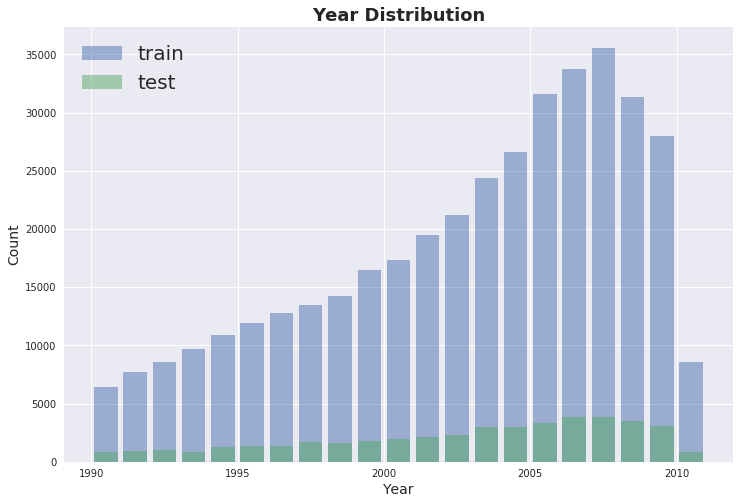

In [11]:
#bins = np.linspace(1990, 2010, 21)
plt.figure(figsize = (12,8))
plt.hist(np.ravel(trainY_df), bins=range(1990,2012), alpha=0.5,  histtype = 'bar', rwidth=0.8, label='train')
plt.hist(np.ravel(testY_df), bins=range(1990,2012), alpha=0.5, histtype = 'bar', rwidth=0.8, label='test')
plt.legend(loc='upper left', prop={'size':20})
plt.title('Year Distribution',fontweight="bold", fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


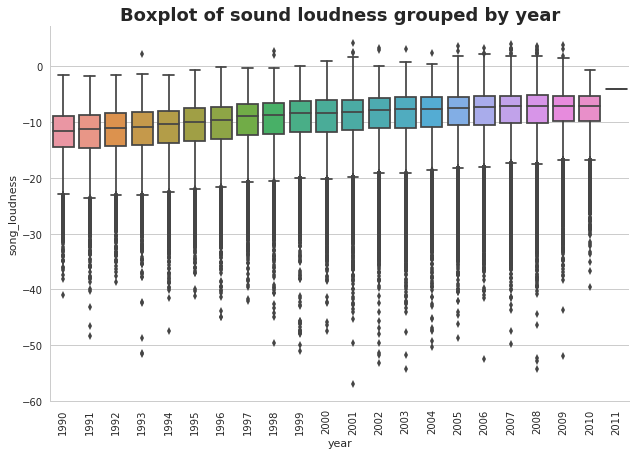

In [12]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.factorplot(kind = 'box', x="year", y="song_loudness", data=train_df, size=6, aspect=1.5)
plt.xticks(rotation=90)
plt.title('Boxplot of sound loudness grouped by year',fontweight="bold", fontsize=18)
sns.plt.show()


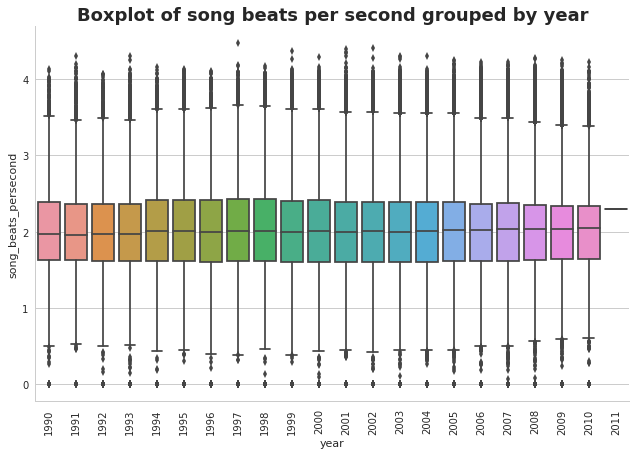

In [13]:
ax = sns.factorplot(kind = 'box', x="year", y="song_beats_persecond", data=train_df, size=6, aspect=1.5)
plt.xticks(rotation=90)
plt.title('Boxplot of song beats per second grouped by year',fontweight="bold", fontsize=18)
sns.plt.show()

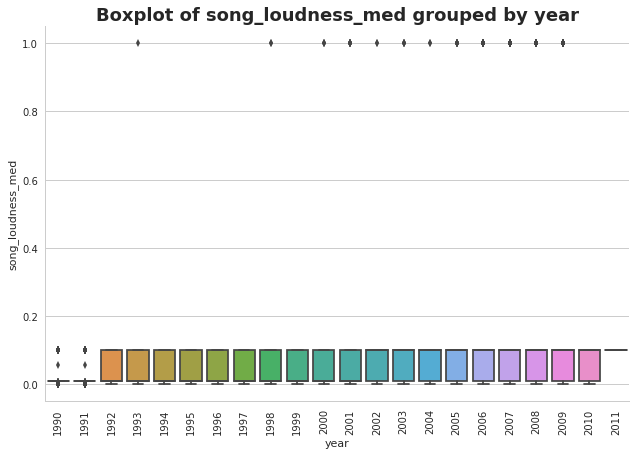

In [14]:
ax = sns.factorplot(kind = 'box', x="year", y="song_loudness_med", data=train_df, size=6, aspect=1.5)
plt.xticks(rotation=90)
plt.title('Boxplot of song_loudness_med grouped by year',fontweight="bold", fontsize=18)
sns.plt.show()

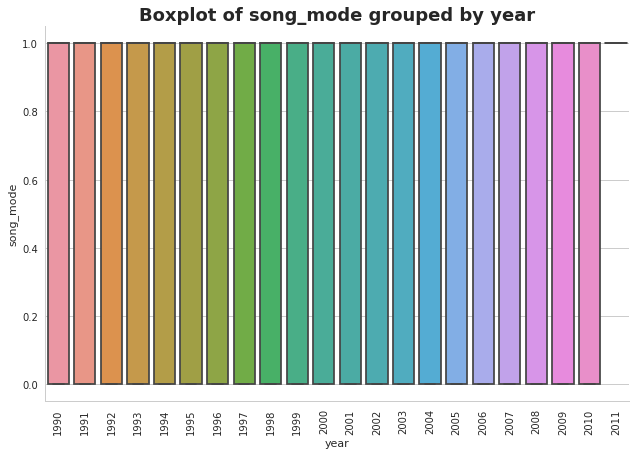

In [15]:
ax = sns.factorplot(kind = 'box', x="year", y="song_mode", data=train_df, size=6, aspect=1.5)
plt.xticks(rotation=90)
plt.title('Boxplot of song_mode grouped by year',fontweight="bold", fontsize=18)
sns.plt.show()

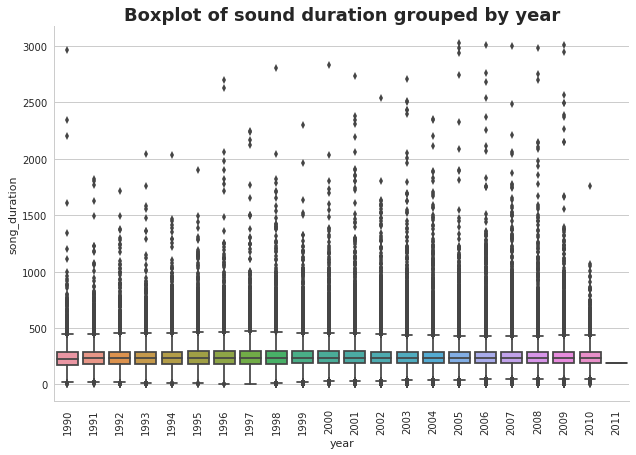

In [16]:
ax = sns.factorplot(kind = 'box', x="year", y="song_duration", data=train_df, size=6, aspect=1.5)
plt.xticks(rotation=90)
plt.title('Boxplot of sound duration grouped by year',fontweight="bold", fontsize=18)
sns.plt.show()

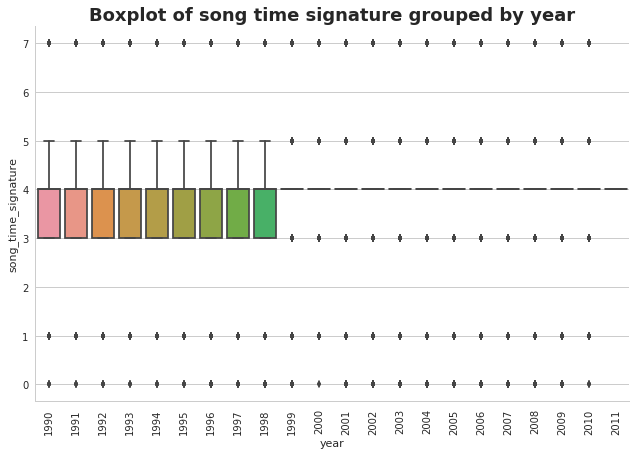

In [17]:
ax = sns.factorplot(kind = 'box', x="year", y="song_time_signature", data=train_df, size=6, aspect=1.5)
plt.xticks(rotation=90)
plt.title('Boxplot of song time signature grouped by year',fontweight="bold", fontsize=18)
sns.plt.show()

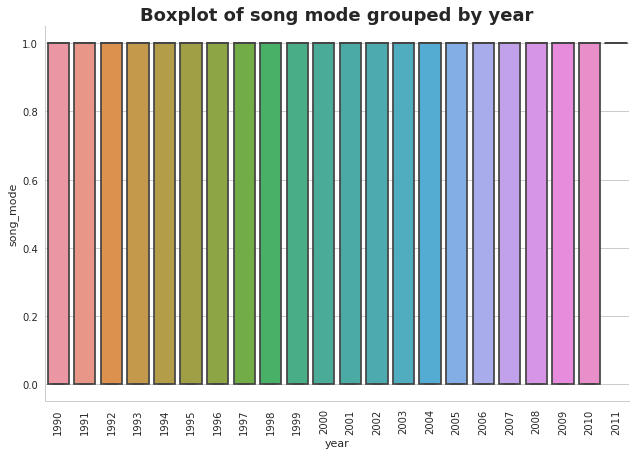

In [18]:
ax = sns.factorplot(kind = 'box', x="year", y="song_mode", data=train_df, size=6, aspect=1.5)
plt.xticks(rotation=90)
plt.title('Boxplot of song mode grouped by year',fontweight="bold", fontsize=18)
sns.plt.show()

In [19]:
train_cr = trainX_df.ix[:,0:-180]
train_cr.insert(15, 'year', trainY_df['year'])
cr = train_cr.corr()

In [30]:
cr.shape

(16, 16)

In [21]:
cr.head(15)

,song_beats_persecond,song_duration,song_end_fade_in,song_start_fade_out,song_key,song_loudness,song_loudness_max,song_loudness_min,song_loudness_med,song_loudness_time_max,song_loudness_time_min,song_loudness_time_med,song_mode,song_tempo,song_time_signature,year
song_beats_persecond,1.000000,0.002215,-0.032983,0.006821,0.016359,0.181285,0.032025,0.039325,0.151096,0.014800,0.037264,0.093221,-0.009743,0.996561,0.057819,-0.000010
song_duration,0.002215,1.000000,0.108482,0.997200,0.025036,0.005543,0.011100,-0.059260,-0.043216,0.060569,-0.064572,-0.084702,-0.065515,-0.019056,0.105531,0.008399
song_end_fade_in,-0.032983,0.108482,1.000000,0.105558,-0.002372,-0.084643,-0.021054,-0.023327,-0.058413,0.001127,-0.025154,-0.046973,-0.004695,-0.029143,-0.009201,-0.012055
song_start_fade_out,0.006821,0.997200,0.105558,1.000000,0.025878,0.013356,0.013250,-0.055856,-0.035463,0.062300,-0.060789,-0.078720,-0.066042,-0.015633,0.105233,0.008634
song_key,0.016359,0.025036,-0.002372,0.025878,1.000000,0.033063,0.010521,-0.001326,0.023171,0.000838,-0.001008,0.010944,-0.200661,0.014448,0.009460,-0.001971
song_loudness,0.181285,0.005543,-0.084643,0.013356,0.033063,1.000000,0.303071,0.100240,0.706684,0.104826,0.109239,0.509630,-0.011016,0.170211,0.091524,0.228852
song_loudness_max,0.032025,0.011100,-0.021054,0.013250,0.010521,0.303071,1.000000,0.035741,0.216604,0.106096,0.039754,0.181631,-0.013662,0.027204,0.032340,0.082925
song_loudness_min,0.039325,-0.059260,-0.023327,-0.055856,-0.001326,0.100240,0.035741,1.000000,0.114224,0.057994,0.789917,0.226293,0.001480,0.041851,-0.022182,0.037270
song_loudness_med,0.151096,-0.043216,-0.058413,-0.035463,0.023171,0.706684,0.216604,0.114224,1.000000,0.144969,0.136437,0.671997,-0.006143,0.146513,0.043228,0.209421
song_loudness_time_max,0.014800,0.060569,0.001127,0.062300,0.000838,0.104826,0.106096,0.057994,0.144969,1.000000,0.095850,0.213625,0.001585,0.013472,0.013185,0.038445


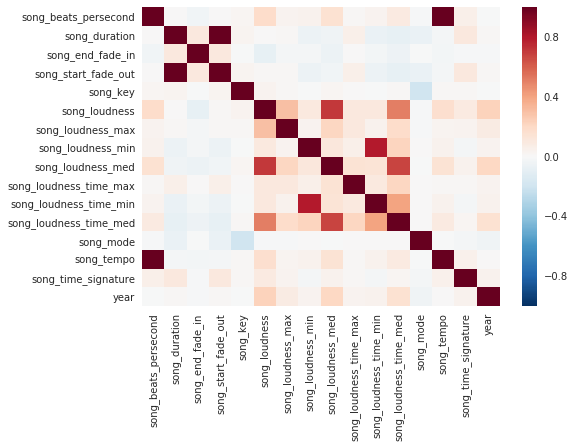

In [22]:
sns.heatmap(cr)
plt.show()

In [23]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
forml = 'year ~ song_beats_persecond + song_duration + song_end_fade_in + song_start_fade_out + song_key + song_loudness + song_loudness_max + song_loudness_min + song_loudness_med + song_loudness_time_max + song_loudness_time_min + song_loudness_time_med + song_mode + song_tempo + song_time_signature'
cw_lm=ols(formula = forml, data=train_df).fit() #Specify C for Categorical
print(sm.stats.anova_lm(cw_lm, typ=2))

                              sum_sq        df            F         PR(>F)
song_beats_persecond    2.092929e+04       1.0   800.180702  7.435340e-176
song_duration           2.348836e+03       1.0    89.802053   2.646159e-21
song_end_fade_in        6.305485e+01       1.0     2.410749   1.205055e-01
song_start_fade_out     1.939852e+03       1.0    74.165534   7.209420e-18
song_key                3.124144e+03       1.0   119.444060   8.450564e-28
song_loudness           1.419450e+05       1.0  5426.924088   0.000000e+00
song_loudness_max       1.661240e+03       1.0    63.513468   1.596996e-15
song_loudness_min       1.614847e+02       1.0     6.173974   1.296472e-02
song_loudness_med       3.369972e+04       1.0  1288.426949  1.072145e-281
song_loudness_time_max  2.132054e+02       1.0     8.151392   4.303039e-03
song_loudness_time_min  1.048269e+02       1.0     4.007802   4.529085e-02
song_loudness_time_med  5.126653e+01       1.0     1.960051   1.615086e-01
song_mode               1

## Features with high p value
song_end_fade_in, song_loudness, song_loudness_min, song_loudness_time_max, 
song_loudness_time_min, song_loudness_time_med have high p value. 

# Features to keep
song_duration, song_start_fade_out, song_key, song_loudness_max, song_loudness_med, song_mode, song_tempo, song_time_signature 

In [24]:
trX = trainX_df.ix[:,0:3]
trX = trX.join(trainX_df.ix[:,4:13])
trX = trX.join(trainX_df.ix[:,14:15])
trX = trX.join(trainX_df.ix[:,105:195])
tesX = testX_df.ix[:,0:3]
tesX = tesX.join(testX_df.ix[:,4:13])
tesX = tesX.join(testX_df.ix[:,14:15])
tesX = tesX.join(testX_df.ix[:,105:195])

In [25]:
trX.head()

,song_beats_persecond,song_duration,song_end_fade_in,song_key,song_loudness,song_loudness_max,song_loudness_min,song_loudness_med,song_loudness_time_max,song_loudness_time_min,...,timbre80,timbre81,timbre82,timbre83,timbre84,timbre85,timbre86,timbre87,timbre88,timbre89
0,2.028249,137.06404,0.276,5,-7.390,0.1,0.000001,0.1,0.029211,0.0,...,36.297724,2.587756,0.971701,-26.216825,5.050970,-10.341241,3.550053,-6.363039,6.630155,-3.351419
1,1.668476,128.26077,0.225,9,-6.822,0.1,0.000001,0.1,0.062526,0.0,...,73.077501,8.748606,-17.406284,-13.099049,-25.012023,-12.232571,7.830893,-2.467830,3.321361,-2.315212
2,1.445382,141.13914,0.235,6,-6.855,0.1,0.000001,0.1,0.054405,0.0,...,70.326789,12.946360,-10.324368,-24.837769,8.766298,-0.920194,18.765484,4.592097,2.219196,0.340061
3,2.567431,108.66893,0.258,1,-5.633,0.1,0.000001,0.1,0.025350,0.0,...,50.535168,11.552168,-27.247643,-8.782058,-12.042823,-9.539300,28.618106,8.254348,-0.437426,5.662652
4,2.591111,152.05832,0.222,9,-5.305,0.1,0.000001,0.1,0.039164,0.0,...,55.818511,13.416927,-6.578979,-18.549397,-3.278718,-2.350345,16.070168,1.395176,2.735530,0.828039


In [26]:
trX.shape

(389855, 103)

In [27]:
tesX.shape

(43440, 103)

# Models

In [34]:
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [29]:
linear = linear_model.LinearRegression(copy_X=True, fit_intercept=True, normalize=True)
linear.fit(trX, trainY_df)
predictedY = linear.predict(tesX)
predictedY_r = np.rint(predictedY)
predictedY_df = pd.DataFrame(predictedY_r.astype(int))
mean_absolute_error(testY_df, predictedY_df)

3.8984346224677715

In [31]:
reg = linear_model.Lasso(alpha = 1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True)
reg.fit(trainX_df, trainY_df)
predictedY = reg.predict(testX_df)
predictedY_r = np.rint(predictedY)
predictedY_df = pd.DataFrame(predictedY_r.astype(int))
mean_absolute_error(testY_df, predictedY_df)

4.4654696132596685

In [32]:
reg = linear_model.Ridge(alpha = 1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True)
reg.fit(trainX_df, trainY_df)
predictedY = reg.predict(testX_df)
predictedY_r = np.rint(predictedY)
predictedY_df = pd.DataFrame(predictedY_r.astype(int))
mean_absolute_error(testY_df, predictedY_df)

4.0558701657458567

In [ ]:
clf = RandomForestRegressor(n_estimators = 200, min_samples_leaf  = 15, n_jobs = -1)
clf.fit(trainX_df, np.ravel(trainY_df))
predictedY = clf.predict(testX_df)
predictedY_r = np.rint(predictedY)
predictedY_df = pd.DataFrame(predictedY_r.astype(int))
mean_absolute_error(testY_df, predictedY_df)

3.6714779005524862

In [ ]:
clf = AdaBoostRegressor(n_estimators = 200)
clf.fit(trainX_df, np.ravel(trainY_df))
predictedY = clf.predict(testX_df)
predictedY_r = np.rint(predictedY)
predictedY_df = pd.DataFrame(predictedY_r.astype(int))
mean_absolute_error(testY_df, predictedY_df)

4.1365101289134438

In [38]:
clf = GradientBoostingRegressor(n_estimators = 200, min_samples_leaf = 10)
clf.fit(trainX_df, np.ravel(trainY_df))
predictedY = clf.predict(testX_df)
predictedY_r = np.rint(predictedY)
predictedY_df = pd.DataFrame(predictedY_r.astype(int))
mean_absolute_error(testY_df, predictedY_df)

3.669498158379374